<a href="https://colab.research.google.com/github/diegovillendel/datascience/blob/master/Desafio_enem_Codenation_final.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Desafio Codenation**
Descubra as melhores notas de matemática do ENEM 2016

In [0]:
#instalando a bibliotec Pandas Profile
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip
##Essa biblioteca é muito interessanto para a visualização comparativa e estatística de um dataset, fornecendo informações importantes 
##como (correlações, variáveis faltantes, linhas duplicadas, etc) tudo isso de forma visual

     - 29.1MB 45.8MB/s
     |████████████████████████████████| 61kB 3.4MB/s 
     |████████████████████████████████| 604kB 8.7MB/s 
     |████████████████████████████████| 3.1MB 43.8MB/s 
     |████████████████████████████████| 71kB 9.1MB/s 
     |████████████████████████████████| 296kB 45.1MB/s 
  Created wheel for pandas-profiling: filename=pandas_profiling-2.8.0-py2.py3-none-any.whl size=259932 sha256=a16ba86c97967df9fdcc35bd11323af9ada54446a933dbb2f15f01bb81464006
  Stored in directory: /tmp/pip-ephem-wheel-cache-ti1rxi4p/wheels/56/c2/dd/8d945b0443c35df7d5f62fa9e9ae105a2d8b286302b92e0109
  Created wheel for confuse: filename=confuse-1.1.0-cp36-none-any.whl size=17574 sha256=0709313a92af305ecf2ca94f5ab50cf30753195df9d0aedd93e6f13201d3d108
  Stored in directory: /root/.cache/pip/wheels/f6/8b/23/41a1b516f6d8d4cc81f5bdb55394a47cdbe9659c53668d3c9e
  Created wheel for htmlmin: filename=htmlmin-0.1.12-cp36-none-any.whl size=27084 sha256=6c71bdac10938fa6836019e9a251b17788d9775a0158465ef090

In [1]:
import pandas as pd #Biblioteca para trabalho com Dataframes
from google.colab import files #Biblioteca para carregamento de arquivos junto a base de dados local do Colab
from pandas_profiling import ProfileReport #Biblioteca para geração de relatórios detalhado de um dataset
from sklearn.svm import SVC #Importação do Support Vector Classification - Variação do Support Vector Machine
from sklearn.preprocessing import MinMaxScaler #método para preprocessamento de dados, alterando a escala dos mesmos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
import numpy as np
import matplotlib.pyplot as plt #lib para criar graficos comuns ao estilo matlab
import seaborn as sns #biblioteca utilizada para os plots mais bonitos
from sklearn import metrics #biblioteca com as ferramentos de medição de desempenho


/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
#Upload dos arquivos a serem utilizados no desafio
uploaded = files.upload()

Saving test.csv to test.csv
Saving train.csv to train.csv


In [0]:
#Atribuindo os arquivos dataset as respectivas variáveis
data_train = pd.read_csv("train.csv")
data_test = pd.read_csv("test.csv")

Análise dos dados

In [0]:
data_train.head()

Unnamed: 0                              NU_INSCRICAO  ...  Q049  Q050
0           1  ed50e8aaa58e7a806c337585efee9ca41f1eb1ad  ...     B     D
1           2  2c3acac4b33ec2b195d77e7c04a2d75727fad723  ...     C     A
2           3  f4545f8ccb9ff5c8aad7d32951b3f251a26e6568  ...     B     A
3           4  3d6ec248fef899c414e77f82d5c6d2bffbeaf7fe  ...     A     A
4           5  bf896ac8d3ecadd6dba1dfbf50110afcbf5d3268  ...     A     A

[5 rows x 167 columns]

In [0]:
data_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Columns: 167 entries, Unnamed: 0 to Q050
dtypes: float64(28), int64(79), object(60)
memory usage: 17.5+ MB


In [0]:
data_train.describe()

Unnamed: 0   NU_ANO  ...          Q040         Q041
count  13730.000000  13730.0  ...  13730.000000  2938.000000
mean    2288.173926   2016.0  ...      4.442098     3.671545
std     1321.230607      0.0  ...      1.181549     1.746444
min        0.000000   2016.0  ...      0.000000     0.000000
25%     1144.000000   2016.0  ...      4.000000     3.000000
50%     2288.000000   2016.0  ...      5.000000     5.000000
75%     3432.000000   2016.0  ...      5.000000     5.000000
max     4586.000000   2016.0  ...      5.000000     5.000000

[8 rows x 107 columns]

In [0]:
data_train.dtypes

Unnamed: 0                  int64
NU_INSCRICAO               object
NU_ANO                      int64
CO_MUNICIPIO_RESIDENCIA     int64
NO_MUNICIPIO_RESIDENCIA    object
                            ...  
Q046                       object
Q047                       object
Q048                       object
Q049                       object
Q050                       object
Length: 167, dtype: object

In [0]:
nans = data_train.isnull().sum()
nans[nans > 0]

TP_ESTADO_CIVIL                  528
CO_MUNICIPIO_NASCIMENTO          609
NO_MUNICIPIO_NASCIMENTO          609
CO_UF_NASCIMENTO                 609
SG_UF_NASCIMENTO                 609
TP_ENSINO                       9448
CO_ESCOLA                       9448
CO_MUNICIPIO_ESC                9448
NO_MUNICIPIO_ESC                9448
CO_UF_ESC                       9448
SG_UF_ESC                       9448
TP_DEPENDENCIA_ADM_ESC          9448
TP_LOCALIZACAO_ESC              9448
TP_SIT_FUNC_ESC                 9448
NO_ENTIDADE_CERTIFICACAO       12092
CO_UF_ENTIDADE_CERTIFICACAO    12092
SG_UF_ENTIDADE_CERTIFICACAO    12092
NU_NOTA_CN                      3389
NU_NOTA_CH                      3389
NU_NOTA_LC                      3597
NU_NOTA_MT                      3597
TX_RESPOSTAS_CN                 3389
TX_RESPOSTAS_CH                 3389
TX_RESPOSTAS_LC                 3597
TX_RESPOSTAS_MT                 3597
TX_GABARITO_CN                  3389
TX_GABARITO_CH                  3389
T

In [0]:
data_train.shape

(13730, 167)

Definindo os subdataset para treino

In [0]:
subdata_train = data_train[['NU_IDADE', 'TP_SEXO', 'TP_ESTADO_CIVIL', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO',  'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']]
subdata_test = data_test[['NU_IDADE', 'TP_SEXO', 'TP_COR_RACA', 'TP_ST_CONCLUSAO', 'TP_ESCOLA', 'IN_TREINEIRO',  'NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']]

In [84]:
subdata_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13730 entries, 0 to 13729
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_IDADE         13730 non-null  int64  
 1   TP_SEXO          13730 non-null  object 
 2   TP_ESTADO_CIVIL  13202 non-null  float64
 3   TP_COR_RACA      13730 non-null  int64  
 4   TP_ST_CONCLUSAO  13730 non-null  int64  
 5   TP_ESCOLA        13730 non-null  int64  
 6   IN_TREINEIRO     13730 non-null  int64  
 7   NU_NOTA_CN       10341 non-null  float64
 8   NU_NOTA_CH       10341 non-null  float64
 9   NU_NOTA_LC       10133 non-null  float64
 10  NU_NOTA_MT       10133 non-null  float64
 11  NU_NOTA_REDACAO  10133 non-null  float64
dtypes: float64(6), int64(5), object(1)
memory usage: 1.3+ MB


In [188]:
subdata_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4576 entries, 0 to 4575
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   NU_IDADE         4576 non-null   int64  
 1   TP_SEXO          4576 non-null   object 
 2   TP_COR_RACA      4576 non-null   int64  
 3   TP_ST_CONCLUSAO  4576 non-null   int64  
 4   TP_ESCOLA        4576 non-null   int64  
 5   IN_TREINEIRO     4576 non-null   int64  
 6   NU_NOTA_CN       3442 non-null   float64
 7   NU_NOTA_CH       3442 non-null   float64
 8   NU_NOTA_LC       3377 non-null   float64
 9   NU_NOTA_REDACAO  3377 non-null   float64
dtypes: float64(4), int64(5), object(1)
memory usage: 357.6+ KB


In [85]:
subdata_train.describe()

NU_IDADE  TP_ESTADO_CIVIL  ...    NU_NOTA_MT  NU_NOTA_REDACAO
count  13730.000000     13202.000000  ...  10133.000000     10133.000000
mean      21.593809         0.116043  ...    482.497928       529.048258
std        7.043654         0.365986  ...     99.826323       154.294758
min       13.000000         0.000000  ...      0.000000         0.000000
25%       17.000000         0.000000  ...    408.900000       440.000000
50%       19.000000         0.000000  ...    461.200000       540.000000
75%       23.000000         0.000000  ...    537.600000       600.000000
max       67.000000         3.000000  ...    952.000000      1000.000000

[8 rows x 11 columns]

Devido a alta quantidade de valores nulos na coluna DT_ENSINO , substituirei os valores nulos pela moda da coluna

In [21]:
subdata_train.TP_ESTADO_CIVIL.mode()

0    0.0
dtype: float64

In [103]:
subdata_train.TP_ESTADO_CIVIL.fillna(int(subdata_train.TP_ESTADO_CIVIL.mode()), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [23]:
subdata_train.describe()

NU_IDADE  TP_ESTADO_CIVIL  ...    NU_NOTA_MT  NU_NOTA_REDACAO
count  13730.000000     13730.000000  ...  10133.000000     10133.000000
mean      21.593809         0.111580  ...    482.497928       529.048258
std        7.043654         0.359573  ...     99.826323       154.294758
min       13.000000         0.000000  ...      0.000000         0.000000
25%       17.000000         0.000000  ...    408.900000       440.000000
50%       19.000000         0.000000  ...    461.200000       540.000000
75%       23.000000         0.000000  ...    537.600000       600.000000
max       67.000000         3.000000  ...    952.000000      1000.000000

[8 rows x 11 columns]

In [189]:
subdata_train.fillna(subdata_train.mean(), inplace=True)
subdata_test.fillna(subdata_test.mean(), inplace=True)

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:6245: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


Visualização dos dados usando a ferramente de análise ProfileReport

In [0]:
ProfileReport(subdata_train)

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4133: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  errors=errors,


Substituindo dos dados da coluna Sexo por dados categoricos numéricos

In [105]:
subdata_train.TP_SEXO = pd.Categorical(subdata_train.TP_SEXO)
subdata_train.TP_SEXO = subdata_train.TP_SEXO.cat.codes

/usr/local/lib/python3.6/dist-packages/pandas/core/generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


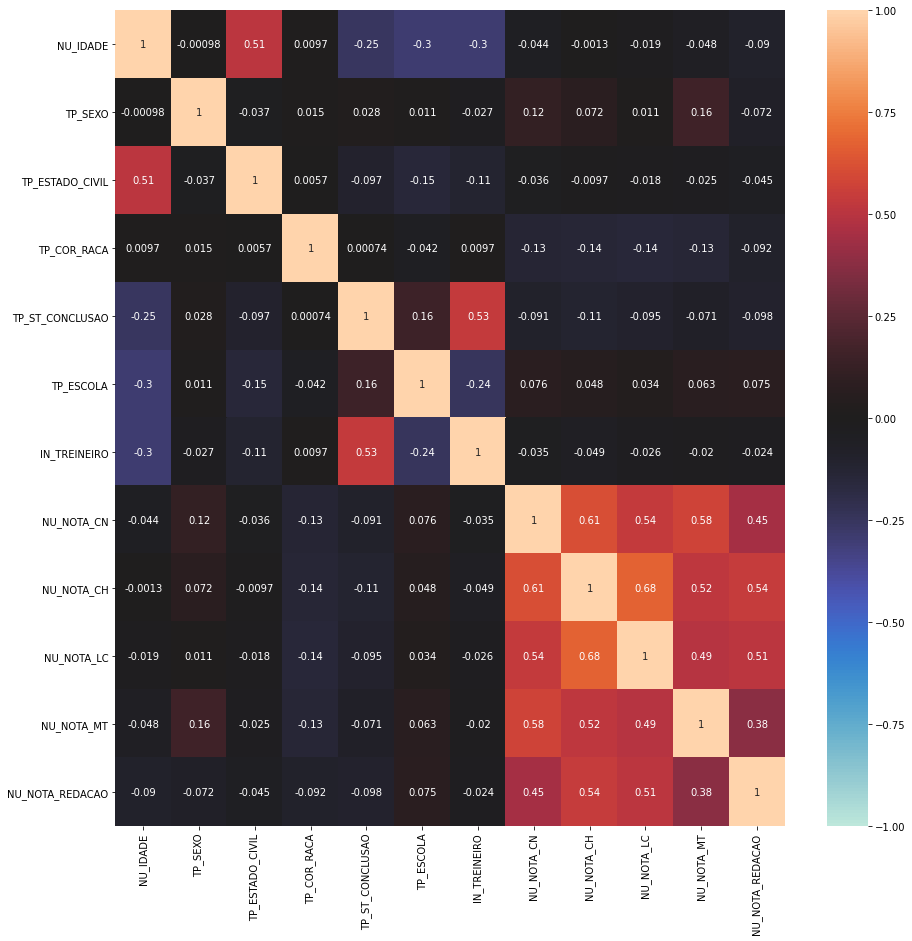

In [27]:
#realizando o plot da matriz de correlação
plt.figure(figsize=(15, 15))
correlacao = subdata_train.corr()  #construindo a matriz de correlação
sns.heatmap(correlacao, annot=True,vmin=-1, vmax=1,center= 0)  #plotando a matriz de correlação com o seaborn
plt.show()

In [28]:
subdata_train

NU_IDADE  TP_SEXO  ...  NU_NOTA_MT  NU_NOTA_REDACAO
0            24        1  ...  399.400000       520.000000
1            17        0  ...  459.800000       580.000000
2            21        0  ...  482.497928       529.048258
3            25        0  ...  482.497928       529.048258
4            28        1  ...  482.497928       529.048258
...         ...      ...  ...         ...              ...
13725        20        1  ...  403.200000       440.000000
13726        33        0  ...  452.400000       560.000000
13727        15        0  ...  398.000000       600.000000
13728        36        1  ...  386.600000       460.000000
13729        17        1  ...  428.900000       520.000000

[13730 rows x 12 columns]

Dividindo o dataset entre dados de entrada X e target para o treinamento e validação.
Devido a baixa correlação entre os dados, deixarei no dataset de treino somente as colunas referentes a notas.

In [0]:
X = subdata_train[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']]
y = subdata_train['NU_NOTA_MT']
X_teste = subdata_test[['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_LC', 'NU_NOTA_REDACAO']]

In [0]:
#Distribuição dos dados entre teste e validação
X_train, X_validation, y_train, y_validation = train_test_split(X, y, train_size=0.8, random_state = 50,)

Treinamento de teste de modelos

Regressão linear

In [213]:
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)
prediction_linear = linear_model.predict(X_validation)
print("SCORE: {}". format(linear_model.score(X_validation, y_validation)))
print("Raiz quadrada do erro quadratico médio: {}" .format(metrics.mean_squared_error(y_validation, prediction_linear, squared=False)))

SCORE: 0.39064958703150154
Raiz quadrada do erro quadratico médio: 67.46637284856969


Multilayer Perceptron

In [214]:
from sklearn.neural_network import MLPRegressor
MLP_model = MLPRegressor(max_iter=500)
MLP_model.fit(X_train, y_train)
prediction_MLP = MLP_model.predict(X_validation)
print("SCORE: {}". format(MLP_model.score(X_validation, y_validation)))
print("Raiz quadrada do erro quadratico médio: {}" .format(metrics.mean_squared_error(y_validation, prediction_MLP, squared=False)))

SCORE: 0.4025002064400519
Raiz quadrada do erro quadratico médio: 66.80711029229516


Random Forest

In [215]:
from sklearn.ensemble import RandomForestRegressor
RFR_model = RandomForestRegressor(random_state=0)
RFR_model.fit(X_train, y_train)
prediction_RFR = RFR_model.predict(X_validation)
print("SCORE: {}". format(RFR_model.score(X_validation, y_validation)))
print("Raiz quadrada do erro quadratico médio: {}" .format(metrics.mean_squared_error(y_validation, prediction_RFR, squared=False)))

SCORE: 0.3867643663814172
Raiz quadrada do erro quadratico médio: 67.68111402525577


DecisionTreeRegressor

In [216]:
from sklearn.tree import DecisionTreeRegressor
DTR_model = DecisionTreeRegressor()
DTR_model.fit(X_train, y_train)
prediction_DTR = DTR_model.predict(X_validation)
print("SCORE: {}". format(DTR_model.score(X_validation, y_validation)))
print("Raiz quadrada do erro quadratico médio: {}" .format(metrics.mean_squared_error(y_validation, prediction_DTR, squared=False)))

SCORE: -0.17127178083486005
Raiz quadrada do erro quadratico médio: 93.53682995853778


Support vector Machine

In [217]:
from sklearn.svm import SVR
SVR_model = SVR()
SVR_model.fit(X_train, y_train)
prediction_SVR = SVR_model.predict(X_validation)
print("SCORE: {}". format(SVR_model.score(X_validation, y_validation)))
print("Raiz quadrada do erro quadratico médio: {}" .format(metrics.mean_squared_error(y_validation, prediction_SVR, squared=False)))

SCORE: 0.36360169228770267
Raiz quadrada do erro quadratico médio: 68.94746693674637


LogisticRegression

In [218]:
from sklearn.linear_model import LogisticRegression
Log_model = LinearRegression()
Log_model.fit(X_train, y_train)
prediction_Log = Log_model.predict(X_validation)
print("SCORE: {}". format(Log_model.score(X_validation, y_validation)))
print("Raiz quadrada do erro quadratico médio: {}" .format(metrics.mean_squared_error(y_validation, prediction_Log, squared=False)))


SCORE: 0.39064958703150154
Raiz quadrada do erro quadratico médio: 67.46637284856969


HuberRegressor

In [219]:
from sklearn.linear_model import HuberRegressor
Hub_model = HuberRegressor()
Hub_model.fit(X_train, y_train)
prediction_Hub = Hub_model.predict(X_validation)
print("SCORE: {}". format(Hub_model.score(X_validation, y_validation)))
print("Raiz quadrada do erro quadratico médio: {}" .format(metrics.mean_squared_error(y_validation, prediction_Hub, squared=False)))

SCORE: 0.39107759922763774
Raiz quadrada do erro quadratico médio: 67.44267424893857


PolynomialFeatures




In [220]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
Poly_model = Pipeline([('poly', PolynomialFeatures(degree=3)), ('linear', LinearRegression(fit_intercept=False))])
Poly_model.fit(X_train, y_train)
prediction_Poly = Poly_model.predict(X_validation)
print("SCORE: {}". format(Poly_model.score(X_validation, y_validation)))
print("Raiz quadrada do erro quadratico médio: {}" .format(metrics.mean_squared_error(y_validation, prediction_Poly, squared=False)))

SCORE: 0.42668468236493784
Raiz quadrada do erro quadratico médio: 65.4410983472071


Seleção do melhor modelo e geração do arquivo .cvs

In [0]:
#Atribua o modelo selecionado a variável model
model = Poly_model
prediction_final = model.predict(X_teste)

In [0]:
#Criando o formado do arquivo para submissão
prediction = pd.DataFrame()
prediction['NU_INSCRICAO'] = data_test.NU_INSCRICAO
prediction['NU_NOTA_MT'] = prediction_final
#Geração do arquivo .csv
prediction.to_csv('PREDICAO_ENEM2006.csv', index=False)
#Download do arquivo .csv
files.download('PREDICAO_ENEM2006.csv')